In [39]:
import pandas as pd

In [40]:
df = pd.read_csv('/home/arnold/bike_location/csv/train.csv')

In [41]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


1. DATA CLEANING

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [43]:
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [44]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [45]:
from matplotlib import pyplot as plt

In [46]:
%matplotlib inline

In [47]:
# plt.scatter(df.area,df.price,color='red', marker='+')
# plt.plot(df.area, reg.predict(df[['area','bedrooms','age']]),color='blue')

Recherche des outliers par rapport à windspeed en utlisant la méthode de percentile

In [48]:
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [49]:
max_threasold = df['temp'].quantile(0.95)
max_threasold

32.8

In [50]:
df[df['temp']>max_threasold]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
2245,2011-06-01 11:00:00,2,0,1,2,33.62,40.150,59,15.0013,26,86,112
2246,2011-06-01 12:00:00,2,0,1,1,35.26,41.665,53,0.0000,32,137,169
2247,2011-06-01 13:00:00,2,0,1,1,36.90,40.910,37,12.9980,29,125,154
2248,2011-06-01 14:00:00,2,0,1,1,36.90,40.910,37,16.9979,40,105,145
2249,2011-06-01 15:00:00,2,0,1,1,36.90,41.665,39,19.9995,25,127,152
...,...,...,...,...,...,...,...,...,...,...,...,...
9080,2012-09-01 17:00:00,3,0,0,2,33.62,38.635,52,0.0000,205,258,463
9081,2012-09-01 18:00:00,3,0,0,2,33.62,38.635,52,0.0000,184,258,442
9173,2012-09-05 14:00:00,3,0,1,1,33.62,39.395,56,7.0015,34,177,211
9244,2012-09-08 13:00:00,3,0,0,1,33.62,38.635,52,35.0008,233,435,668


In [51]:
min_threasold = df['temp'].quantile(0.05)
min_threasold

8.2

In [52]:
df[df['temp']<min_threasold]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
49,2011-01-03 04:00:00,1,0,1,1,6.56,6.820,47,26.0027,0,1,1
50,2011-01-03 05:00:00,1,0,1,1,6.56,6.820,47,19.0012,0,3,3
51,2011-01-03 06:00:00,1,0,1,1,5.74,5.305,50,26.0027,0,30,30
52,2011-01-03 07:00:00,1,0,1,1,5.74,6.820,50,12.9980,1,63,64
53,2011-01-03 08:00:00,1,0,1,1,5.74,6.060,50,19.0012,1,153,154
...,...,...,...,...,...,...,...,...,...,...,...,...
6455,2012-03-06 05:00:00,1,0,1,1,7.38,9.090,51,15.0013,0,25,25
6456,2012-03-06 06:00:00,1,0,1,1,7.38,10.605,51,7.0015,3,99,102
6457,2012-03-06 07:00:00,1,0,1,1,6.56,9.090,55,8.9981,5,270,275
6458,2012-03-06 08:00:00,1,0,1,1,6.56,9.090,59,7.0015,14,487,501


In [53]:
min_threasold, max_threasold = df.windspeed.quantile([0.001,0.999])
min_threasold,max_threasold

(0.0, 43.9989)

In [54]:
df[df.windspeed<min_threasold]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count


In [55]:
df[df.windspeed > max_threasold]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
760,2011-02-15 01:00:00,1,0,1,1,12.30,12.120,42,51.9987,0,5,5
761,2011-02-15 02:00:00,1,0,1,1,11.48,11.365,41,46.0022,1,2,3
868,2011-02-19 15:00:00,1,0,0,1,18.04,21.970,16,50.0021,84,87,171
2755,2011-07-03 17:00:00,3,0,0,3,32.80,37.120,49,56.9969,181,177,358
2756,2011-07-03 18:00:00,3,0,0,3,32.80,37.120,49,56.9969,74,107,181
6141,2012-02-12 03:00:00,1,0,0,2,4.10,2.275,46,46.0022,0,14,14
6142,2012-02-12 04:00:00,1,0,0,2,4.10,2.275,46,47.9988,0,1,1
6513,2012-03-08 15:00:00,1,0,1,1,26.24,31.060,38,46.0022,24,161,185
6988,2012-04-09 12:00:00,2,0,1,1,22.14,25.760,28,47.9988,94,186,280


recherche des outliers par rapport à l'humidité en utilisant la méthode de percentile

In [56]:
min_threasold, max_threasold = df.humidity.quantile([0.001,0.999])
min_threasold,max_threasold

(0.0, 100.0)

In [57]:
df[df.humidity<min_threasold]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count


In [58]:
df[df.humidity > max_threasold]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count


De toutes les méthodes utilisées, nous remarquons qu'il n'y q pas d'outliers dans notre système jusqu'à présent

2. DATA ANALYSIS

In [59]:
import plotly.express as px

In [60]:
p = df.groupby('registered')['count'].sum().sort_values(ascending=False).to_frame()

fig = px.bar(p, y='count')
fig.update_layout(height=800, width=1800)
fig.update_layout(title='Total Revenue (R$) per category')
fig.show()

Text(0, 0.5, 'count')

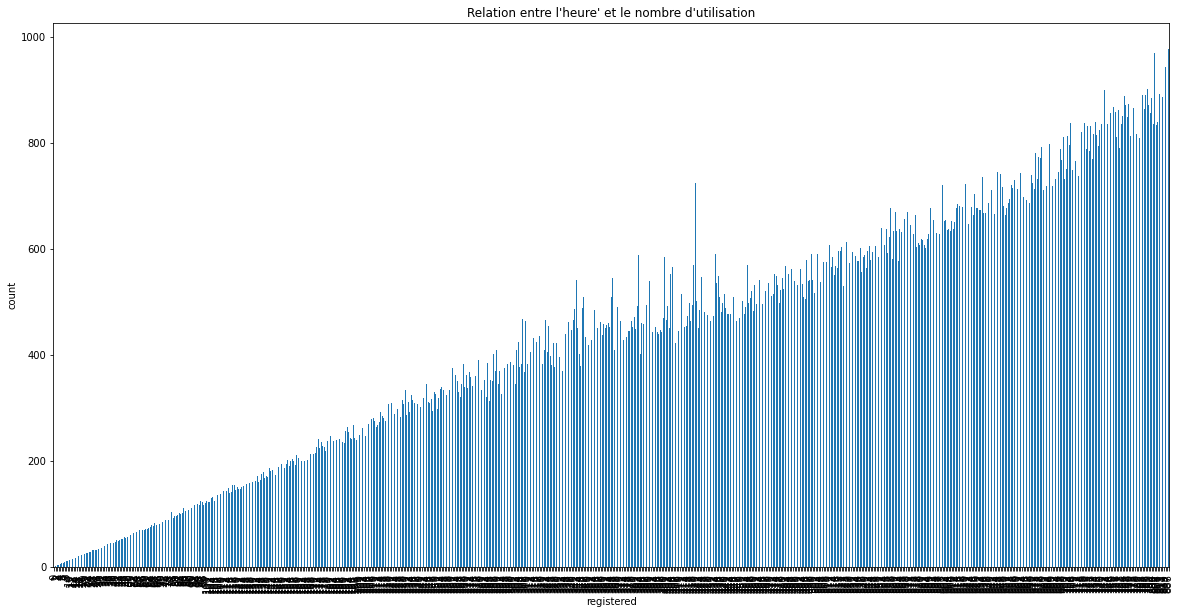

In [61]:
df.groupby('registered').mean()['count'].plot.bar(figsize=(20,10))
plt.title("Relation entre l'heure' et le nombre d'utilisation")
plt.ylabel("count")

In [62]:
p = df.groupby('season')['count'].sum().sort_values(ascending=False).to_frame()

fig = px.bar(p, y='count')
fig.update_layout(height=800, width=1800)
#fig.update_layout(title='Total Revenue (R$) per category')
fig.show()

In [63]:
p = df.groupby('workingday')['count'].sum().sort_values(ascending=False).to_frame()

fig = px.bar(p, y='count')
fig.update_layout(height=800, width=1800)
#fig.update_layout(title='Total Revenue (R$) per category')
fig.show()

Text(0, 0.5, 'count')

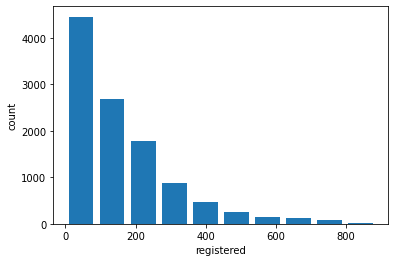

In [64]:
plt.hist(df.registered, rwidth=0.8)
plt.xlabel('registered')
plt.ylabel('count')

In [65]:
px.histogram(df.registered)

division de la base de données

In [66]:
groups = df.groupby(df.datetime)


In [67]:
train_set = df[df['datetime'] >= '2012-08-19']


In [68]:
train_set

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
9039,2012-08-19 00:00:00,3,0,0,1,27.06,31.060,57,6.0032,44,143,187
9040,2012-08-19 01:00:00,3,0,0,1,26.24,30.305,65,0.0000,29,102,131
9041,2012-08-19 02:00:00,3,0,0,2,25.42,30.305,69,6.0032,16,103,119
9042,2012-08-19 03:00:00,3,0,0,2,25.42,30.305,61,11.0014,21,34,55
9043,2012-08-19 04:00:00,3,0,0,2,25.42,30.305,65,11.0014,4,22,26
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [69]:
df['datetime']

0        2011-01-01 00:00:00
1        2011-01-01 01:00:00
2        2011-01-01 02:00:00
3        2011-01-01 03:00:00
4        2011-01-01 04:00:00
                ...         
10881    2012-12-19 19:00:00
10882    2012-12-19 20:00:00
10883    2012-12-19 21:00:00
10884    2012-12-19 22:00:00
10885    2012-12-19 23:00:00
Name: datetime, Length: 10886, dtype: object

In [70]:
test_set = df[df['datetime'] <'2012-08-19']


In [71]:
test_set

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9034,2012-08-18 19:00:00,3,0,0,1,28.70,31.820,45,11.0014,164,324,488
9035,2012-08-18 20:00:00,3,0,0,1,28.70,31.820,45,7.0015,99,242,341
9036,2012-08-18 21:00:00,3,0,0,1,27.06,31.060,61,0.0000,90,248,338
9037,2012-08-18 22:00:00,3,0,0,1,27.06,31.060,61,0.0000,90,171,261


In [72]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


Encodage

In [74]:
categorial =  ['season']

df_encode = pd.get_dummies(df[categorial], drop_first=True) #drop first permet de oneHotencoder plutot que de get_dummies
df = df.drop(categorial, axis=1).join(df_encode)

In [75]:
df

,datetime,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,season
0,2011-01-01 00:00:00,0,0,1,9.84,14.395,81,0.0000,3,13,16,1
1,2011-01-01 01:00:00,0,0,1,9.02,13.635,80,0.0000,8,32,40,1
2,2011-01-01 02:00:00,0,0,1,9.02,13.635,80,0.0000,5,27,32,1
3,2011-01-01 03:00:00,0,0,1,9.84,14.395,75,0.0000,3,10,13,1
4,2011-01-01 04:00:00,0,0,1,9.84,14.395,75,0.0000,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,0,1,1,15.58,19.695,50,26.0027,7,329,336,4
10882,2012-12-19 20:00:00,0,1,1,14.76,17.425,57,15.0013,10,231,241,4
10883,2012-12-19 21:00:00,0,1,1,13.94,15.910,61,15.0013,4,164,168,4
10884,2012-12-19 22:00:00,0,1,1,13.94,17.425,61,6.0032,12,117,129,4


In [76]:
df['date'] = [d.date() for d in df['datetime']]
df['time'] = [d.time() for d in df['datetime']]

In [77]:
df

,datetime,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,season,date,time
0,2011-01-01 00:00:00,0,0,1,9.84,14.395,81,0.0000,3,13,16,1,2011-01-01,00:00:00
1,2011-01-01 01:00:00,0,0,1,9.02,13.635,80,0.0000,8,32,40,1,2011-01-01,01:00:00
2,2011-01-01 02:00:00,0,0,1,9.02,13.635,80,0.0000,5,27,32,1,2011-01-01,02:00:00
3,2011-01-01 03:00:00,0,0,1,9.84,14.395,75,0.0000,3,10,13,1,2011-01-01,03:00:00
4,2011-01-01 04:00:00,0,0,1,9.84,14.395,75,0.0000,0,1,1,1,2011-01-01,04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,0,1,1,15.58,19.695,50,26.0027,7,329,336,4,2012-12-19,19:00:00
10882,2012-12-19 20:00:00,0,1,1,14.76,17.425,57,15.0013,10,231,241,4,2012-12-19,20:00:00
10883,2012-12-19 21:00:00,0,1,1,13.94,15.910,61,15.0013,4,164,168,4,2012-12-19,21:00:00
10884,2012-12-19 22:00:00,0,1,1,13.94,17.425,61,6.0032,12,117,129,4,2012-12-19,22:00:00


In [78]:
df.drop(columns={'datetime'}, axis=1,inplace=True)

In [79]:
df

,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,season,date,time
0,0,0,1,9.84,14.395,81,0.0000,3,13,16,1,2011-01-01,00:00:00
1,0,0,1,9.02,13.635,80,0.0000,8,32,40,1,2011-01-01,01:00:00
2,0,0,1,9.02,13.635,80,0.0000,5,27,32,1,2011-01-01,02:00:00
3,0,0,1,9.84,14.395,75,0.0000,3,10,13,1,2011-01-01,03:00:00
4,0,0,1,9.84,14.395,75,0.0000,0,1,1,1,2011-01-01,04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,0,1,1,15.58,19.695,50,26.0027,7,329,336,4,2012-12-19,19:00:00
10882,0,1,1,14.76,17.425,57,15.0013,10,231,241,4,2012-12-19,20:00:00
10883,0,1,1,13.94,15.910,61,15.0013,4,164,168,4,2012-12-19,21:00:00
10884,0,1,1,13.94,17.425,61,6.0032,12,117,129,4,2012-12-19,22:00:00


In [83]:
df['weather']

0        1
1        1
2        1
3        1
4        1
        ..
10881    1
10882    1
10883    1
10884    1
10885    1
Name: weather, Length: 10886, dtype: int64

In [94]:
df['days'] = df['date'].dt.dayofweek + 1

In [110]:
df.isnull().sum()

holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
season        0
date          0
time          0
days          0
HI            0
dtype: int64

In [108]:
df['time'] = df['time'].apply(pd.Timestamp)

TypeError: Cannot convert input [00:00:00] of type <class 'datetime.time'> to Timestamp

In [111]:
df['time'] = pd.to_datetime(df['time'].astype(str))

In [112]:
df['time'] = pd.to_datetime(df['time'])

In [113]:
df['hours'] = df['time'].dt.hour

In [114]:
df

,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,season,date,time,days,HI,hours
0,0,0,1,9.84,14.395,81,0.0000,3,13,16,1,2011-01-01,2022-03-22 00:00:00,6,32.985168,0
1,0,0,1,9.02,13.635,80,0.0000,8,32,40,1,2011-01-01,2022-03-22 01:00:00,6,35.686332,1
2,0,0,1,9.02,13.635,80,0.0000,5,27,32,1,2011-01-01,2022-03-22 02:00:00,6,35.686332,2
3,0,0,1,9.84,14.395,75,0.0000,3,10,13,1,2011-01-01,2022-03-22 03:00:00,6,35.312264,3
4,0,0,1,9.84,14.395,75,0.0000,0,1,1,1,2011-01-01,2022-03-22 04:00:00,6,35.312264,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,0,1,1,15.58,19.695,50,26.0027,7,329,336,4,2012-12-19,2022-03-22 19:00:00,3,28.300528,19
10882,0,1,1,14.76,17.425,57,15.0013,10,231,241,4,2012-12-19,2022-03-22 20:00:00,3,29.039963,20
10883,0,1,1,13.94,15.910,61,15.0013,4,164,168,4,2012-12-19,2022-03-22 21:00:00,3,29.830135,21
10884,0,1,1,13.94,17.425,61,6.0032,12,117,129,4,2012-12-19,2022-03-22 22:00:00,3,29.830135,22


In [86]:
df['date'] = pd.to_datetime(df['date'])

In [95]:
df

,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,season,date,time,days
0,0,0,1,9.84,14.395,81,0.0000,3,13,16,1,2011-01-01,00:00:00,6
1,0,0,1,9.02,13.635,80,0.0000,8,32,40,1,2011-01-01,01:00:00,6
2,0,0,1,9.02,13.635,80,0.0000,5,27,32,1,2011-01-01,02:00:00,6
3,0,0,1,9.84,14.395,75,0.0000,3,10,13,1,2011-01-01,03:00:00,6
4,0,0,1,9.84,14.395,75,0.0000,0,1,1,1,2011-01-01,04:00:00,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,0,1,1,15.58,19.695,50,26.0027,7,329,336,4,2012-12-19,19:00:00,3
10882,0,1,1,14.76,17.425,57,15.0013,10,231,241,4,2012-12-19,20:00:00,3
10883,0,1,1,13.94,15.910,61,15.0013,4,164,168,4,2012-12-19,21:00:00,3
10884,0,1,1,13.94,17.425,61,6.0032,12,117,129,4,2012-12-19,22:00:00,3


In [104]:
# Heat index (indice de chaleur) ; en degré celsius
c1 = -42.379
c2 = 2.04901523
c3 = 10.14333127
c4 = -0.22475541
c5 = -6.83783e-3
c6 = -5.481717e-2
c7 = 1.22874e-3
c8 = 8.5282e-4
c9 = -1.99e-6
T = 1.8*df['temp']+32
R = df['humidity']
df['HI'] = c1 + c2*T + c3*R + c4*T*R + c5*pow(T,2) + c6*pow(R,2) + c7*pow(T,2)*R + c8*T*pow(R,2) + c9*pow(T,2)*pow(R,2)
# Reconversion de HI en degrés celsius
df['HI'] = (df['HI'] - 32)*(5/9)

In [115]:
df.head(3)

,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,season,date,time,days,HI,hours
0,0,0,1,9.84,14.395,81,0.0,3,13,16,1,2011-01-01,2022-03-22 00:00:00,6,32.985168,0
1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,2011-01-01,2022-03-22 01:00:00,6,35.686332,1
2,0,0,1,9.02,13.635,80,0.0,5,27,32,1,2011-01-01,2022-03-22 02:00:00,6,35.686332,2


In [116]:
df.drop(columns={'time'}, axis=1, inplace=True)

In [117]:
df

,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,season,date,days,HI,hours
0,0,0,1,9.84,14.395,81,0.0000,3,13,16,1,2011-01-01,6,32.985168,0
1,0,0,1,9.02,13.635,80,0.0000,8,32,40,1,2011-01-01,6,35.686332,1
2,0,0,1,9.02,13.635,80,0.0000,5,27,32,1,2011-01-01,6,35.686332,2
3,0,0,1,9.84,14.395,75,0.0000,3,10,13,1,2011-01-01,6,35.312264,3
4,0,0,1,9.84,14.395,75,0.0000,0,1,1,1,2011-01-01,6,35.312264,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,0,1,1,15.58,19.695,50,26.0027,7,329,336,4,2012-12-19,3,28.300528,19
10882,0,1,1,14.76,17.425,57,15.0013,10,231,241,4,2012-12-19,3,29.039963,20
10883,0,1,1,13.94,15.910,61,15.0013,4,164,168,4,2012-12-19,3,29.830135,21
10884,0,1,1,13.94,17.425,61,6.0032,12,117,129,4,2012-12-19,3,29.830135,22
